### Pokemon Dataset Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# read data
pokeframe = pd.read_csv("pokemon.csv")

In [33]:
pokeframe.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Notes: Rather than work with absolute numbers which are skewed by work with relative ratios or normalised

##### Fastest Pokemon

In [47]:
# Including Legendaries
pokeframe.loc[pokeframe['Speed'].argmax()]['Name']

'DeoxysSpeed Forme'

In [51]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Speed'].argmax()]['Name']

'Ninjask'

##### Healthiest Pokemon

In [50]:
# Including Legendaries
pokeframe.loc[pokeframe['HP'].argmax()]['Name']

'Blissey'

In [53]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['HP'].argmax()]['Name']

'Blissey'

##### Most Physically Dangerous Pokemon

In [56]:
# Including Legendaries
pokeframe.loc[pokeframe['Attack'].argmax()]['Name']

'MewtwoMega Mewtwo X'

In [57]:
# Excluding Legendaries
pokeframe.loc[pokeframe[pokeframe['Legendary']==False]['Attack'].argmax()]['Name']

'HeracrossMega Heracross'

##### Most Physically Hard Pokemon

##### Most Specially Dangerous Pokemon

##### Most Specially Hard Pokemon

Which is the best starter pokemon?

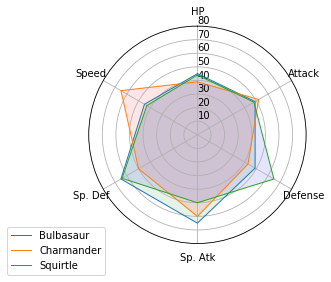

In [34]:
# Radar Chart
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories= np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,80)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pokeframe.loc[0]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Bulbasaur")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Ind2
values=pokeframe.loc[4]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Charmander")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=pokeframe.loc[9]['HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Squirtle")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [74]:
# Create Mega Column
mega = pokeframe['Name'].apply(lambda x: "Mega" in x)
mega.name = 'Mega'
pd.concat([pokeframe, mega], axis = 1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False
